In [40]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sys

In [41]:
def poly(x1, x2):
    """This is the old and original cost function, which we aim to maximize over 
    given manifold"""
    return -5*x1**2 + 2*x1*x2 - x2**2

def poly_mod(z1, z2):
    """This is the new cost function after transforming the manifold"""
    x1 = 2*z1 - 2; x2 = 2*z2 - 4
    return -5*x1**2 + 2*x1*x2 - x2**2

def G(x1, x2, index):
    """ k is the non negetive real number which helps in keeping the x1, x2 inside the manifold.
    index is something either 1 or 2. Since dP/dx1 is different from dP/dx2, we use index to distinguish between them."""
    if index is 1:
        grad = ( 24 - 40*x1 + 8*x2 )
        if grad < 0 :
            k = (-1 * grad) + 20
        else:
            k = 20
        if x1*(grad + k) < 0 :
            k = 0
        return x1*(grad + k)
    elif index is 2:
        grad = ( 8 +  8*x1 - 8*x2 )
        if grad < 0 :
            k = (-1 * grad) + 20
        else:
            k = 20
        if x2*(grad + k) < 0 :
            k = 0
        return x2*(grad + k)
    else:
        print("Pass the correct index")    
    
def GT(x1, x2):
    """Growth Transform function
    Returns the single step Growth Transform output for the chosen Polynomial function"""
    tmp1 = G(x1, x2, 1)
    tmp2 = G(x1, x2, 2)
    if tmp1 < 0 or tmp2 < 0 or tmp1 + tmp2 <= 0 :
        print('x1 = ', x1, 'x2 = ', x2, 'tmp1 =', tmp1, 'tmp2 =', tmp2)
        print("Something fishy")
    else:
        x1_out = tmp1 / (tmp1+tmp2)
        x2_out = 1 - x1_out
        return [x1_out, x2_out]

In [50]:
# lets try with (12, 17) as initilization
# observe the 100 iterations of growth transform

x1 = 150
x2 = 0
k = 16


x1_in = x1; x2_in = x2; x1_list = []; x2_list = []
for iter in range(10):
    # we need to transform the initialized variables before passing them into 
    # algorithm
#    print(iter)
    z1_in = (x1_in + 2)/2 ; z2_in = (x2_in + 4)/2
    
    if iter is 0:
        tmp  = z1_in + z2_in
        z1_in /= tmp ; z2_in /= tmp
        print((z1_in, z2_in))
    
    [z1_out, z2_out] = GT(z1_in, z2_in)
    
    # undo the transform 
    x1_out = 2*z1_out - 2; x2_out = 2*z2_out - 4
    
    # store them in a list so, we can print them
    x1_list.append(x1_out); x2_list.append(x2_out)
    x1_in = x1_out; x2_in = x2_out

x1_x2_list = []
for i in range(len(x1_list)):
    x1_x2_list.append(poly(x1_list[i] ,x2_list[i]))


(0.9743589743589743, 0.02564102564102564)


<IPython.core.display.Javascript object>


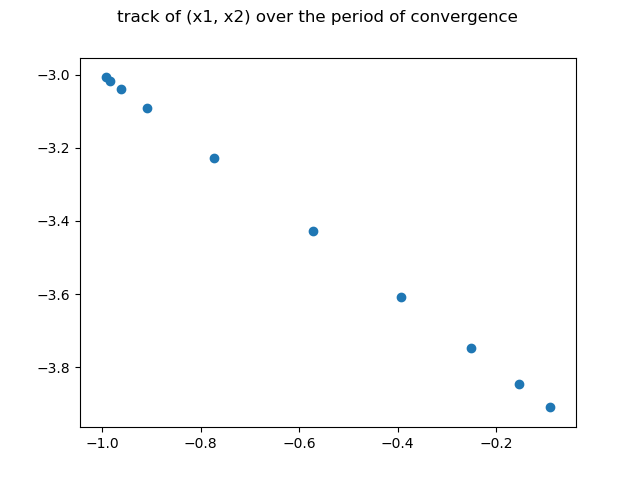

Text(0.5, 0.98, 'track of (x1, x2) over the period of convergence ')

In [51]:
fig1,ax1 = plt.subplots(1,1);  ax1.scatter(x1_list, x2_list); plt.show()
fig1.suptitle('track of (x1, x2) over the period of convergence ', fontsize=12)


<IPython.core.display.Javascript object>


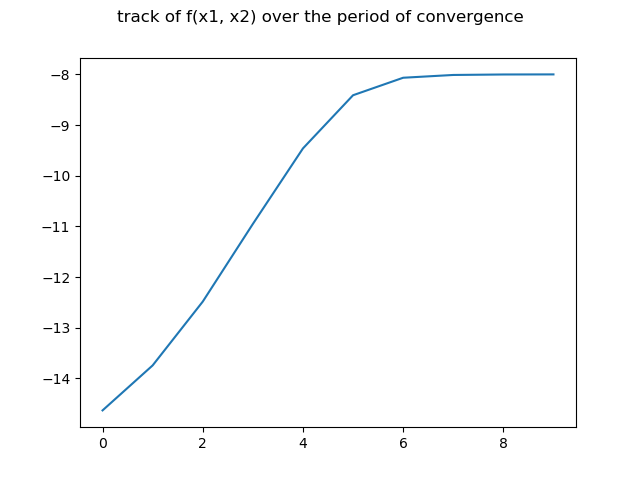

Text(0.5, 0.98, 'track of f(x1, x2) over the period of convergence')

In [54]:
fig2,ax2 = plt.subplots(1,1);  ax2.plot(x1_x2_list); plt.show()
fig2.suptitle('track of f(x1, x2) over the period of convergence', fontsize=12)


<IPython.core.display.Javascript object>


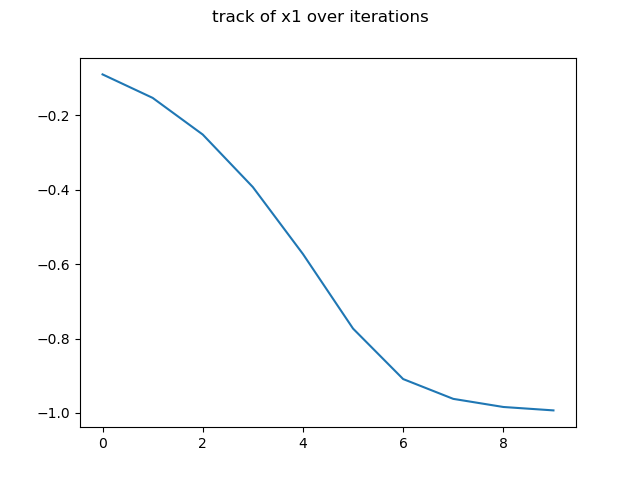

Text(0.5, 0.98, 'track of x1 over iterations')

In [52]:
fig3,ax3 = plt.subplots(1,1);  ax3.plot(x1_list); plt.show()
fig3.suptitle('track of x1 over iterations', fontsize=12)


<IPython.core.display.Javascript object>


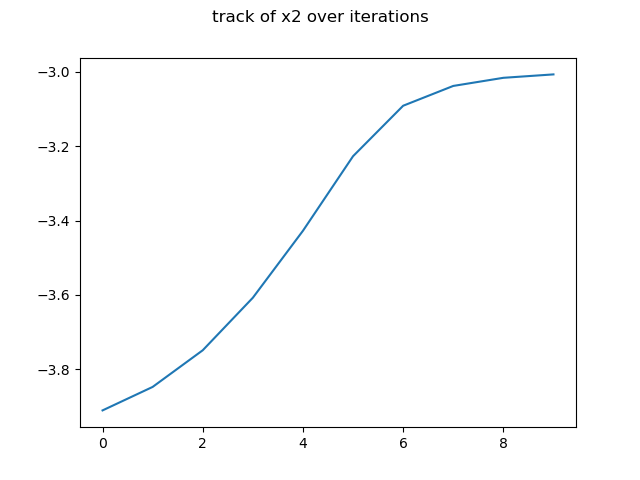

Text(0.5, 0.98, 'track of x2 over iterations')

In [55]:
fig4,ax4 = plt.subplots(1,1);  ax4.plot(x2_list); plt.show()
fig4.suptitle('track of x2 over iterations', fontsize=12)

<IPython.core.display.Javascript object>


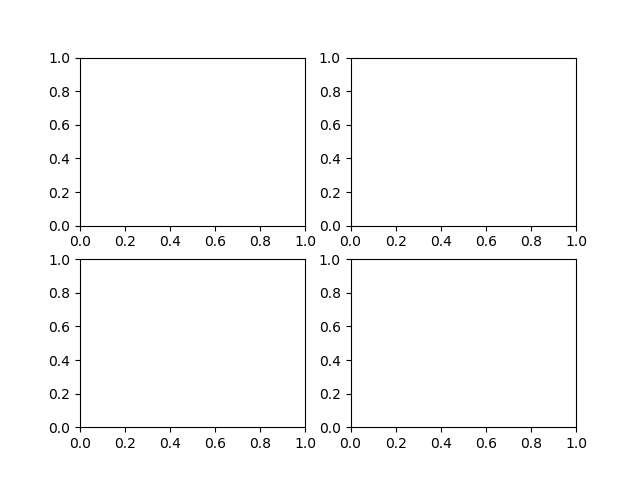

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

In [53]:
fig,ax = plt.subplots(2,2);  ax[0].scatter(x1_list, x2_list); plt.show()
ax[0].set_title('track of (x1, x2) over the period of convergence ')
ax[1].plot(x1_x2_list); plt.show()
ax[1].set_title('track of f(x1, x2) over the period of convergence')
ax[2].plot(x1_list); plt.show()
ax[2].set_title('track of x1 over iterations')
ax[3].plot(x2_list); plt.show()
ax[3].set_title('track of x2 over iterations')